In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X=digits.data
y=digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [17]:
precisions = []

recalls = []

theresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for thereshold in theresholds:
    y_predict = np.array(decision_scores >=thereshold, dtype = "int")
    
    precisions.append(precision_score(y_test,y_predict))
    
    recalls.append(recall_score(y_test, y_predict))
    

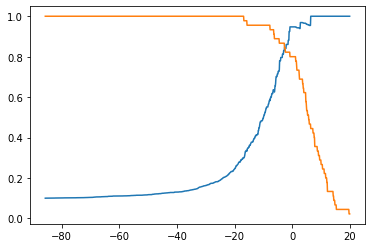

In [18]:
plt.plot(theresholds, precisions)
plt.plot(theresholds, recalls)
plt.show()

 ### precison-recall 曲线

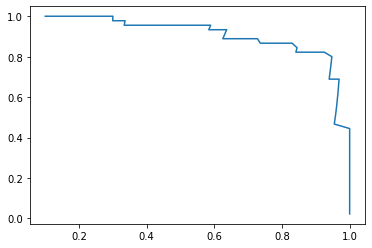

In [20]:
plt.plot(precisions,recalls)
plt.show()

### sklearn 中的 precison-recall 曲线

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, theresholds = precision_recall_curve(y_test, decision_scores)


In [29]:
precisions.shape

(151,)

In [31]:
recalls.shape

(151,)

In [30]:
theresholds.shape

(150,)

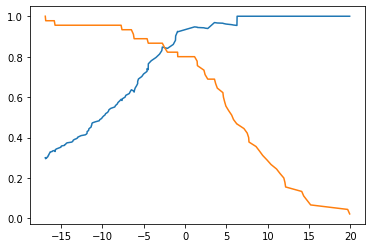

In [32]:
plt.plot(theresholds, precisions[:-1])
plt.plot(theresholds, recalls[:-1]) #[:-1]刨出最后一个 -- 150
plt.show()

[]

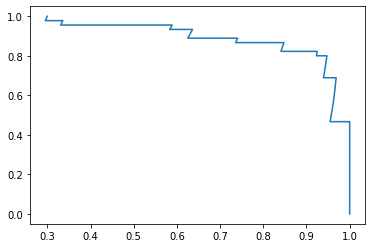

In [33]:
plt.plot(precisions, recalls)
plt.plot()